In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

c = pd.read_excel("./sample.xlsx")
c.head()

,ID,拠点名称,人数,year,a,b,c,d,e,合計
0,1.0,拠点A,2,2016,63,108,83,108,135,99.4
1,NaN,拠点A,14,2017,140,43,79,147,111,104.0
2,NaN,拠点A,12,2018,106,70,110,53,122,92.2
3,2.0,拠点B,13,2016,43,58,107,64,45,63.4
4,NaN,拠点B,10,2017,50,70,87,124,87,83.6


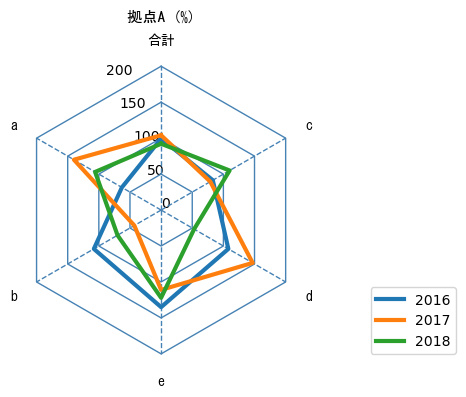

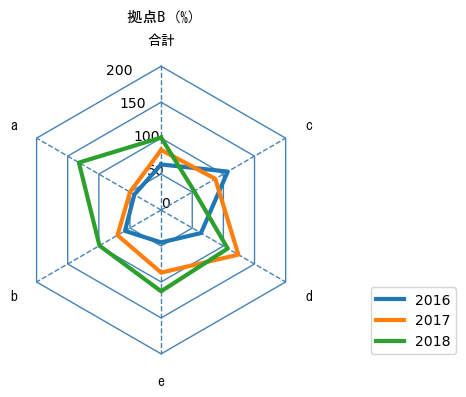

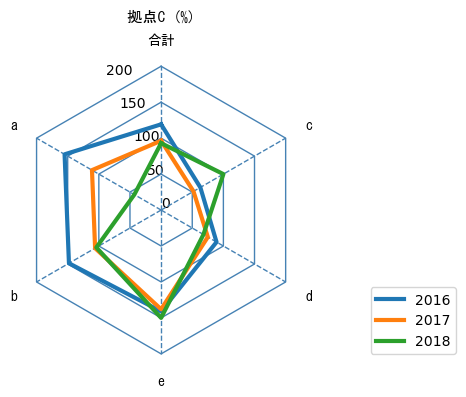

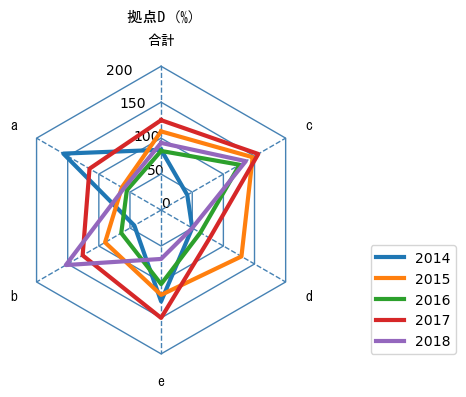

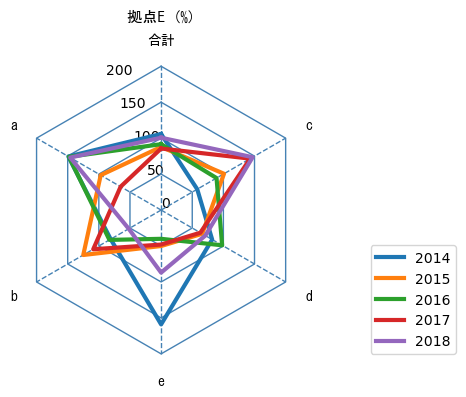

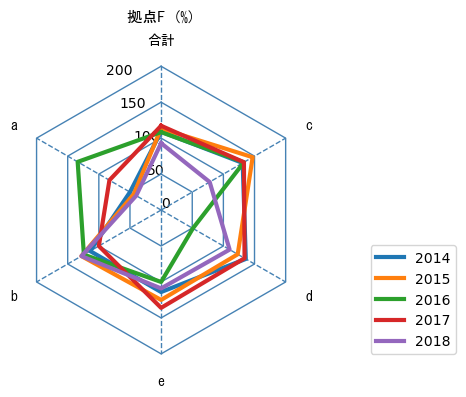

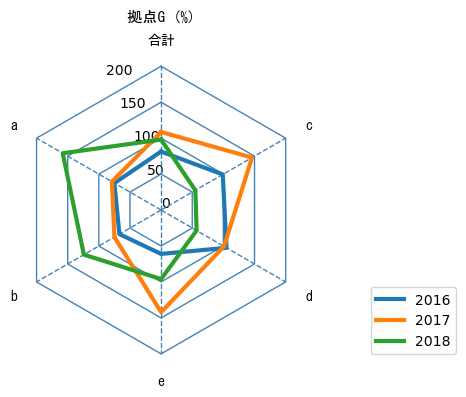

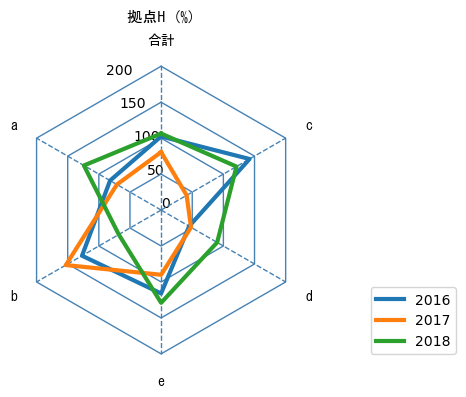

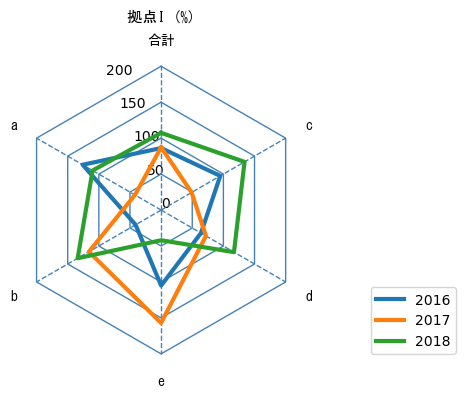

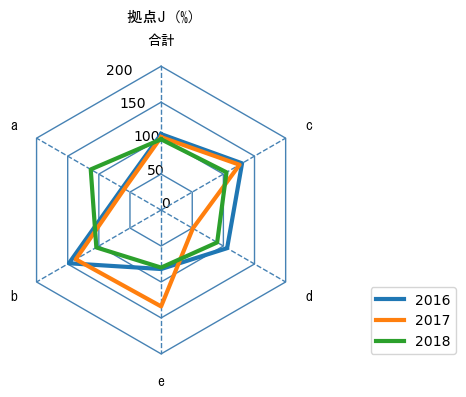

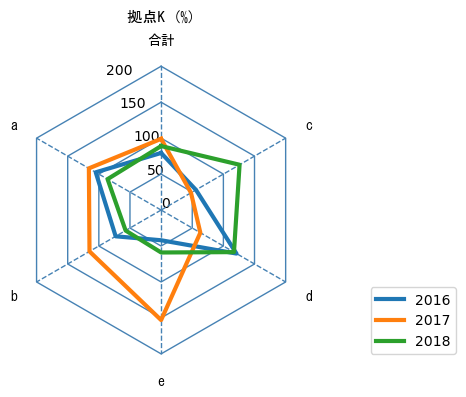

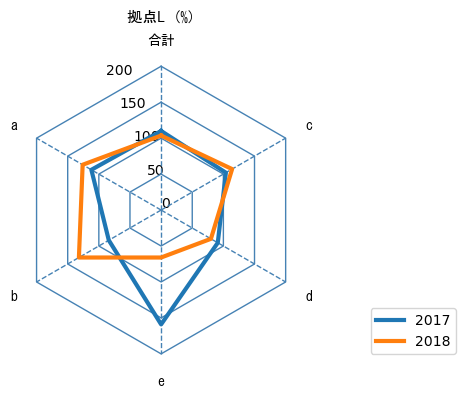

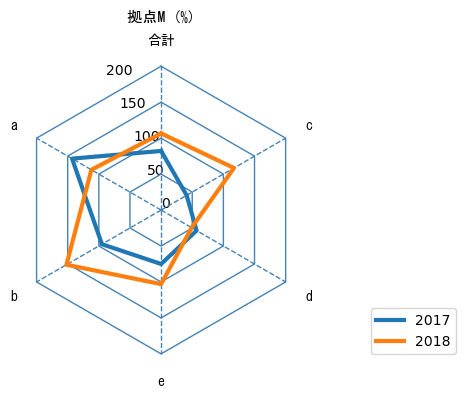

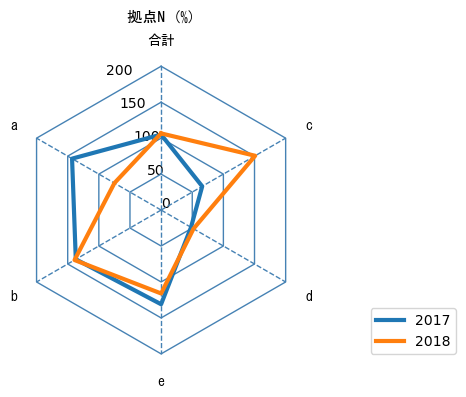

In [8]:
a1 = sorted(set(c['拠点名称']))
labels = ['合計','a','b','e','d','c']

#名前付け
for ii in a1:
    a11 = c[c['拠点名称']==ii]
    b1 = sorted(set(a11['year']))
    kinds = b1
    
    c1 = a11['合計']
    c2 = a11['a']
    c3 = a11['b']
    c4 = a11['e']
    c5 = a11['d']
    c6 = a11['c']
    centers = pd.concat([c1,c2,c3,c4,c5,c6,c1],axis=1)
    centers = np.array(centers)
    
    
    n = len(labels)
    
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    
    
    #解像度
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, polar=True)
        
    #floor = np.floor(centers.min())     
    #ceil = np.ceil(centers.max()) 
    
    #基準
    floor = 0
    ceil = 200
    switch = 1
       
    #色設定
    for i in np.arange(floor, ceil +50, 50):
        if switch ==0:
            ax.plot(angles, [i] * (n + 1), '-', lw=1 , color='teal')
            #ax.plot(angles, [i] * (n + 1), '-', lw=1 , color='steelblue')
        else:
            ax.plot(angles, [i] * (n + 1), '-', lw=1 , color='steelblue')
        
    for i in range(n):
        if switch ==0 :
            ax.plot([angles[i], angles[i]], [floor, ceil], '--', lw=1, color='teal')
            #ax.plot([angles[i], angles[i]], [floor, ceil], '--', lw=1, color='steelblue')
        else:
            ax.plot([angles[i], angles[i]], [floor, ceil], '--', lw=1, color='steelblue')
    
    for i in range(len(kinds)):
        ax.plot(angles, centers[i], lw=3, label=kinds[i])
        #ax.fill(angles, centers[i])
    
    ax.set_thetagrids(angles * 180 / np.pi, labels,fontname="MS Gothic") 
    plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.0)) 

    
    ax.set_theta_zero_location('N')        
    ax.spines['polar'].set_visible(False)  
    ax.grid(False)                         
    
    #軸に数値
    if switch ==0:
        ax.set_yticks([0,100,200,300])                      
    else:
        ax.set_yticks([0,50,100,150,200])
    
    #出力
    #plt.title(str(ii)+' (%)', y=-0.25,fontname="MS Gothic")
    plt.title(str(ii)+' (%)', y=1.1,fontname="MS Gothic",fontsize=11)
    if  os.path.exists('./sample') :
        pass
    else:
        os.mkdir('./sample') 
    
    plt.savefig('./sample/'+str(ii)+'.png',bbox_inches = 'tight')
    plt.show()